### Imports, Globals, and Configuration

In [30]:
# Imports and globals
import pandas as pd
import numpy as np
import json
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

CONFIG_PATH="../config/config.json"

### Define Functions

In [31]:
# Define functions
# Load configuration
with open(CONFIG_PATH) as fp:
    config = json.load(fp)

def get_df(file_path, year=None):
    '''
    Returns a dataframe for a specific year.
    '''
    if year:
        return pd.read_csv(f"{file_path}/{year}.csv")
    else:
        return pd.read_csv(file_path)
    


### Load DataFrame Dictionary (heavy compute for international files)

In [32]:
df = get_df(config["international_data_path"], 2018)

### Data Preprocessing

In [33]:
def preprocess_data(X):
    label_mappings = {}

    for column in X.columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
                
        # Store the mapping for each column
        label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

    # add new boolean column of whether the flight was delayed
    df['BOOL_DEP_DELAY'] = np.where(df['DEP_DELAY'] > 15, 1, 0)
    
    return label_mappings

# Encodes categorical variables
mapping = preprocess_data(df)

In [41]:
df[df['BOOL_DEP_DELAY'] != 1]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,BOOL_DEP_DELAY
48711,2,15,214,186,288,1204,1225,15,5,1231,...,47,45,246,1330,1037,952,214,978,0,0
422558,22,2,65,355,181,1041,1061,14,13,1075,...,46,30,112,1330,1037,952,214,978,0,0
552786,30,2,65,355,181,1041,1062,15,12,1075,...,37,27,112,1330,1037,952,214,978,0,0
635886,34,2,65,355,181,1041,1060,13,17,1078,...,42,28,112,1330,1037,952,214,978,0,0
877867,47,2,65,355,181,1041,1062,15,13,1076,...,39,27,112,1330,1037,952,214,978,0,0
1104414,59,2,152,245,17,1159,1115,2,16,1132,...,79,63,424,1330,1037,952,214,978,0,0
1570398,83,12,3436,316,305,969,979,9,50,1030,...,154,104,557,1330,1037,952,214,978,0,0
1651623,87,12,3191,59,247,417,427,9,69,497,...,139,64,244,1330,1037,952,214,978,0,0
1915722,100,2,160,9,17,1020,1030,9,7,1038,...,150,146,992,1330,1037,952,214,978,0,0
2057495,107,2,160,9,17,1020,1040,14,6,1047,...,150,146,992,1330,1037,952,214,978,0,0


In [40]:
df[df['BOOL_DEP_DELAY'] == 1]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,BOOL_DEP_DELAY
0,0,13,2427,113,91,846,911,59,14,926,...,236,218,1218,1330,1037,952,214,978,0,1
1,0,13,2425,186,307,604,666,56,10,677,...,69,58,308,1330,1037,952,214,978,0,1
2,0,13,2424,320,91,744,809,59,14,824,...,112,99,699,1330,1037,952,214,978,0,1
3,0,13,2423,293,247,875,951,70,18,970,...,168,150,936,1330,1037,952,214,978,0,1
4,0,13,2422,247,14,319,409,84,12,422,...,92,76,586,1330,1037,952,214,978,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,364,1,1813,90,71,863,929,60,19,949,...,85,65,233,1330,1037,952,214,978,0,1
7213442,364,1,1814,71,92,1000,1076,70,17,1094,...,162,141,778,1330,1037,952,214,978,0,1
7213443,364,1,1815,71,214,1144,1209,59,35,1245,...,114,81,396,1330,1037,952,214,978,0,1
7213444,364,1,1816,71,283,709,802,87,10,813,...,27,19,56,1330,1037,952,214,978,0,1


In [34]:
# Get scaler
scaler = StandardScaler()

X = df[['ORIGIN', 'DEP_TIME']].values
y = df['BOOL_DEP_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### PCA to find most important components

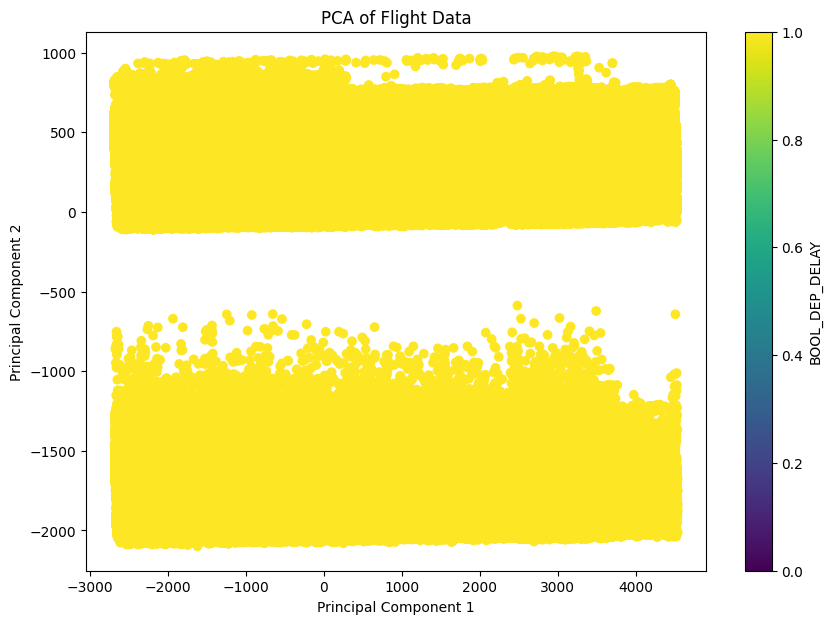

In [35]:
# Perform PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
principal_components = pca.fit_transform(df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

# Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['BOOL_DEP_DELAY'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Flight Data')
plt.colorbar(label='BOOL_DEP_DELAY')
plt.show()

In [36]:
# Get the components (loadings) of the PCA
pca_components = pca.components_

# Create a DataFrame with the components
components_df = pd.DataFrame(pca_components, columns=df.columns, index=['PC1', 'PC2'])
print(components_df)
print('Explained variance ratio:', pca.explained_variance_ratio_)

      FL_DATE  OP_CARRIER  OP_CARRIER_FL_NUM    ORIGIN      DEST  \
PC1  0.000887    0.001039           0.996585 -0.001710 -0.002053   
PC2 -0.000410   -0.000011           0.005836  0.000811 -0.001872   

     CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  \
PC1      0.001888  0.004447   0.004374  0.000793    0.005787  ...   
PC2     -0.114565 -0.132279  -0.025955 -0.002900   -0.133284  ...   

     ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
PC1            -0.010892 -0.011222 -0.078846      -0.002153      -0.001688   
PC2            -0.005724 -0.002057 -0.009266       0.584122       0.460205   

     NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 27  \
PC1  -0.001688       -0.000366            -0.001435         -0.0   
PC2   0.416910        0.095241             0.424000         -0.0   

     BOOL_DEP_DELAY  
PC1    1.366854e-09  
PC2   -1.560423e-09  

[2 rows x 29 columns]
Explained variance ratio: [0.68857989 0.14464415]


### K-NN Classification

In [37]:
# Train the k-NN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

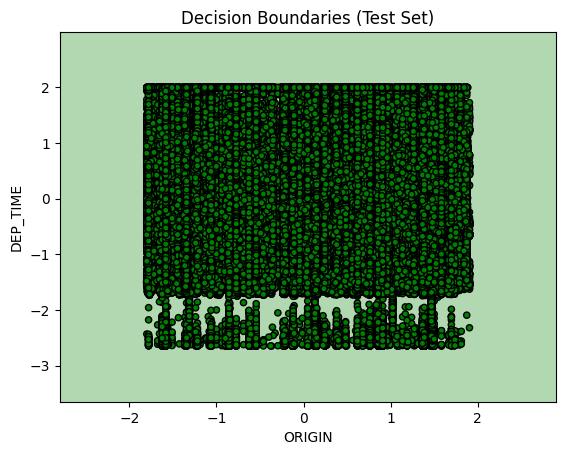

In [38]:

# Define function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('red', 'green')))
    plt.title(title)
    plt.xlabel('ORIGIN')
    plt.ylabel('DEP_TIME')
    plt.show()

# Plot decision boundaries on the testing set
plot_decision_boundaries(X_test, y_test, knn, title='Decision Boundaries (Test Set)')

In [39]:
# Make predictions and evaluate the model
y_pred = knn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(accuracy)

0.9999965342519876
